In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Task specification
task_description = "Mental Health Chatbot"
print("Task Specification:", task_description)

Task Specification: Mental Health Chatbot


In [17]:
# Dataset acquisition
# Assuming you have a CSV file with two columns: 'text' and 'label'
# You may need to adjust the data loading based on your actual dataset
data = pd.read_csv('C:/Users/Avariq Fazlur Rahman/Documents/mental_health_dataset.csv')
texts = data['text'].tolist()
labels = data['label'].tolist()

In [18]:
# Dataset preprocessing
# Load dataset
# Data cleaning (if necessary)

# Split data into train, test, and validation sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.1, random_state=42)

In [19]:
# Display dataset statistics
print("Dataset Statistics:")
print("Train set size:", len(train_texts))
print("Validation set size:", len(val_texts))
print("Test set size:", len(test_texts))

Dataset Statistics:
Train set size: 183
Validation set size: 21
Test set size: 52


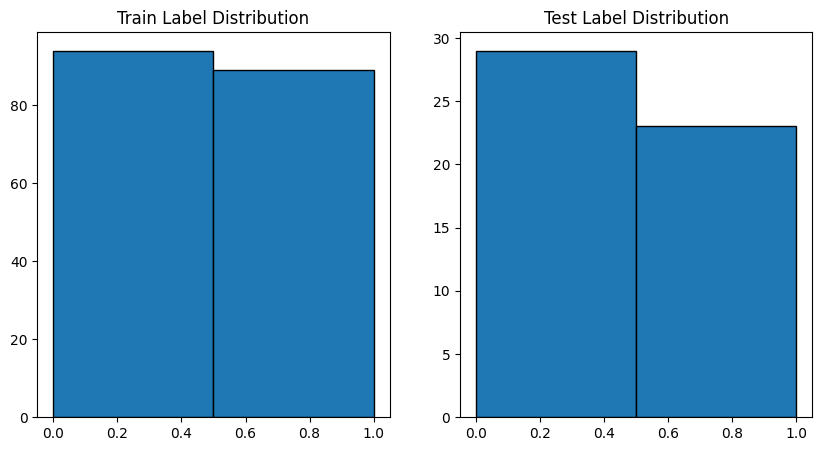

In [20]:
# Dataset observation
# Train and test label distribution graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Train Label Distribution')
plt.hist(train_labels, bins=len(set(train_labels)), edgecolor='black')
plt.subplot(1, 2, 2)
plt.title('Test Label Distribution')
plt.hist(test_labels, bins=len(set(test_labels)), edgecolor='black')
plt.show()

In [21]:
# Feature extraction
# Tokenization (convert text to integer sequences)
# For simplicity, let's use a basic tokenizer. You may need to use a more advanced tokenizer based on your requirements.
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(train_texts).todense()
X_val = vectorizer.transform(val_texts).todense()
X_test = vectorizer.transform(test_texts).todense()

# Convert Integer Sequences to Tensors
y_train = torch.tensor(train_labels)
y_val = torch.tensor(val_labels)
y_test = torch.tensor(test_labels)

train_dataset = TensorDataset(torch.tensor(X_train), y_train)
val_dataset = TensorDataset(torch.tensor(X_val), y_val)
test_dataset = TensorDataset(torch.tensor(X_test), y_test)

In [22]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [23]:
# Model selection
# Let's use a simple neural network for demonstration
class SimpleModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

In [24]:
# Model design
# Model definition
input_size = X_train.shape[1]
output_size = len(set(train_labels))
model = SimpleModel(input_size, output_size)

# Setup the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
# Model training
# Loss Function
# Training function
# Start training
num_epochs = 10

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs.float())
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f'Epoch {epoch + 1}/{num_epochs}, '
              f'Train Loss: {avg_train_loss:.4f}, '
              f'Validation Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

In [26]:
# Start training
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch 1/10, Train Loss: 0.6931, Validation Loss: 0.7000
Epoch 2/10, Train Loss: 0.6803, Validation Loss: 0.6897
Epoch 3/10, Train Loss: 0.6688, Validation Loss: 0.6798
Epoch 4/10, Train Loss: 0.6583, Validation Loss: 0.6701
Epoch 5/10, Train Loss: 0.6476, Validation Loss: 0.6604
Epoch 6/10, Train Loss: 0.6369, Validation Loss: 0.6509
Epoch 7/10, Train Loss: 0.6255, Validation Loss: 0.6415
Epoch 8/10, Train Loss: 0.6153, Validation Loss: 0.6323
Epoch 9/10, Train Loss: 0.6057, Validation Loss: 0.6232
Epoch 10/10, Train Loss: 0.5951, Validation Loss: 0.6144


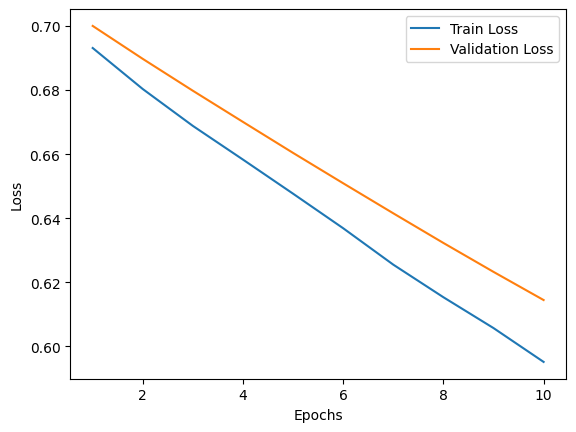

In [27]:
# Display training and validation loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Model evaluation
# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8462


In [29]:
# Model evaluation
# Evaluate the model on the test set
model.eval()
test_loss = 0.0
correct = 0
total = 0
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.numpy())

accuracy = correct / total
precision, recall, f1, support = precision_recall_fscore_support(test_labels, predicted_labels, average='micro')
weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision (Micro): {precision:.4f}')
print(f'Recall (Micro): {recall:.4f}')
print(f'F1 Score (Micro): {f1:.4f}')
print(f'Precision (Weighted): {weighted_precision:.4f}')
print(f'Recall (Weighted): {weighted_recall:.4f}')
print(f'F1 Score (Weighted): {weighted_f1:.4f}')

# Display the model performance table
model_performance_table = pd.DataFrame({
    'Metric': ['Train Loss', 'Validation Loss', 'Test Accuracy', 'Precision (Micro)', 'Recall (Micro)', 'F1 Score (Micro)', 'Precision (Weighted)', 'Recall (Weighted)', 'F1 Score (Weighted)'],
    'Value': [train_losses[-1], val_losses[-1], accuracy, precision, recall, f1, weighted_precision, weighted_recall, weighted_f1]
})
print("\nModel Performance Table:")
print(model_performance_table)

Test Accuracy: 0.8462
Precision (Micro): 0.8462
Recall (Micro): 0.8462
F1 Score (Micro): 0.8462
Precision (Weighted): 0.8571
Recall (Weighted): 0.8462
F1 Score (Weighted): 0.8466

Model Performance Table:
                 Metric     Value
0            Train Loss  0.595124
1       Validation Loss  0.614443
2         Test Accuracy  0.846154
3     Precision (Micro)  0.846154
4        Recall (Micro)  0.846154
5      F1 Score (Micro)  0.846154
6  Precision (Weighted)  0.857094
7     Recall (Weighted)  0.846154
8   F1 Score (Weighted)  0.846610
